# Getting Image Data with MS Bing Image Search API

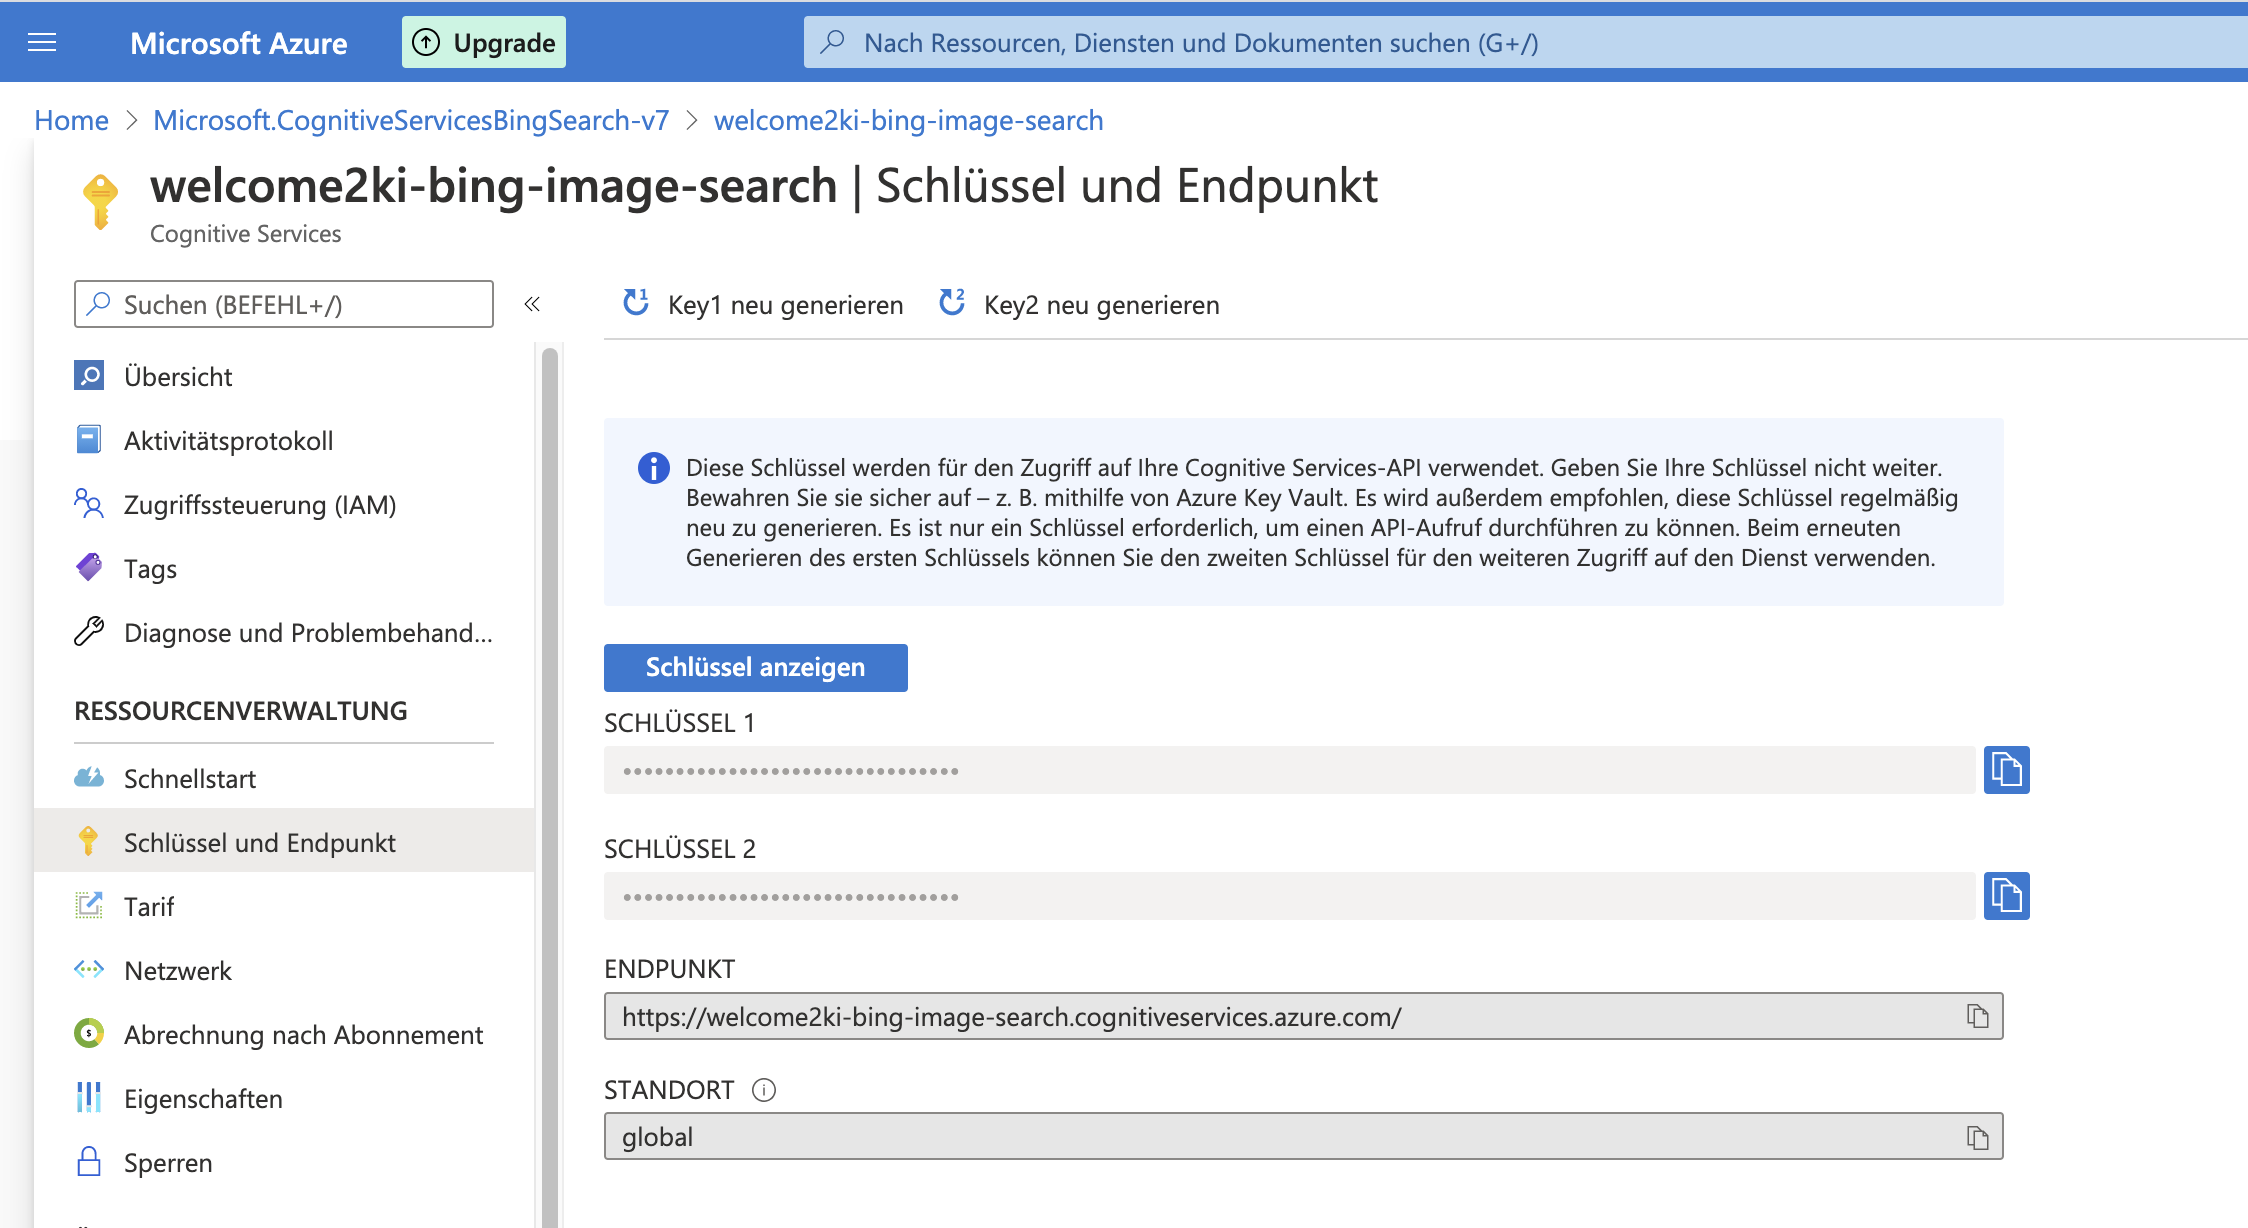azure_bing.png)

In [ ]:
!pip install fastai --upgrade -q

In [ ]:
import fastai
print(fastai.__version__)

2.0.16


In [ ]:
import os
from fastai.vision.all import *

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'XXXXX')

In [ ]:
from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
from msrest.authentication import CognitiveServicesCredentials as auth

In [ ]:
# outdated
#def search_images_bing(key, term, min_sz=128):
#    client = api('https://api.cognitive.microsoft.com', auth(key))
#    return L(client.images.search(query=term, count=150, min_height=min_sz, min_width=min_sz).value)


In [ ]:
def search_images_bing(key, term, min_sz=128, max_images=150):
     params = {'q':term, 'count':max_images, 'min_height':min_sz, 'min_width':min_sz}
     headers = {"Ocp-Apim-Subscription-Key":key}
     search_url = "https://api.bing.microsoft.com/v7.0/images/search"
     response = requests.get(search_url, headers=headers, params=params)
     response.raise_for_status()
     search_results = response.json()    
     return L(search_results['value'])

In [ ]:
# results = search_images_bing(key, 'saab 9-3')
ims = L(results).attrgot('content_url')
len(ims)

150

In [ ]:
help(L)

Help on class L in module fastcore.foundation:

class L(GetAttr, CollBase)
 |  Behaves like a list of `items` but can also index with list of indices or masks
 |  
 |  Method resolution order:
 |      L
 |      GetAttr
 |      CollBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(a, b)
 |  
 |  __addi__(a, b)
 |  
 |  __contains__(self, b)
 |  
 |  __eq__(self, b)
 |      Return self==value.
 |  
 |  __getitem__(self, idx)
 |      Retrieve `idx` (can be list of indices, or mask, or int) items
 |  
 |  __init__(self, items=None, *rest, use_list=False, match=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __invert__(self)
 |  
 |  __iter__(self)
 |  
 |  __mul__(a, b)
 |  
 |  __radd__(a, b)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __reversed__(self)
 |  
 |  __setitem__(self, idx, o)
 |      Set `idx` (can be list of indices, or mask, or int) items to `o` (which is broadcast if not iterable)
 |  
 |  arg

In [ ]:
ims[:4]

(#4) ['https://s1.cdn.autoevolution.com/images/gallery/SAAB-9-3-Aero-Convertible-1868_24.jpg','http://s1.cdn.autoevolution.com/images/gallery/SAAB-9-3-1911_63.jpg','https://s1.cdn.autoevolution.com/images/gallery/SAAB-9-3-Aero-Convertible-1868_37.jpg','https://s1.cdn.autoevolution.com/images/gallery/SAAB-9-3-Aero-Convertible-1868_28.jpg']

In [ ]:
dest = 'images/saab9-3.jpg'
download_url(ims[0], dest)

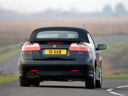

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
model_types = '9-3','9-5','93', '900', '9000'
path = Path('images/saab')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in model_types:
      
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'saab {o}')
        download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
fns = get_image_files(path)
fns

(#735) [Path('images/saab/900/00000034.jpg'),Path('images/saab/900/00000104.jpg'),Path('images/saab/900/00000000.jpg'),Path('images/saab/900/00000018.jpg'),Path('images/saab/900/00000102.jpg'),Path('images/saab/900/00000055.jpg'),Path('images/saab/900/00000138.jpg'),Path('images/saab/900/00000010.jpg'),Path('images/saab/900/00000016.jpg'),Path('images/saab/900/00000048.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#7) [Path('images/saab/900/00000148.png'),Path('images/saab/9000/00000082.jpg'),Path('images/saab/9000/00000108.JPG'),Path('images/saab/9000/00000097.jpg'),Path('images/saab/9000/00000145.jpg'),Path('images/saab/9000/00000027.jpg'),Path('images/saab/9000/00000079.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
!ls images/saab

900  9000  93  9-3  9-5


## Speichern der Bilder auf GDrive

In [ ]:
!tar -czvf saab_images.tar.gz images/saab

images/saab/
images/saab/900/
images/saab/900/00000034.jpg
images/saab/900/00000104.jpg
images/saab/900/00000000.jpg
images/saab/900/00000018.jpg
images/saab/900/00000102.jpg
images/saab/900/00000055.jpg
images/saab/900/00000138.jpg
images/saab/900/00000010.jpg
images/saab/900/00000016.jpg
images/saab/900/00000048.jpg
images/saab/900/00000007.jpg
images/saab/900/00000040.jpg
images/saab/900/00000127.jpg
images/saab/900/00000036.jpg
images/saab/900/00000015.jpg
images/saab/900/00000085.jpg
images/saab/900/00000032.jpg
images/saab/900/00000003.jpg
images/saab/900/00000058.jpg
images/saab/900/00000106.jpg
images/saab/900/00000072.jpg
images/saab/900/00000143.jpg
images/saab/900/00000146.jpg
images/saab/900/00000078.jpg
images/saab/900/00000066.jpg
images/saab/900/00000019.jpg
images/saab/900/00000132.jpg
images/saab/900/00000013.jpg
images/saab/900/00000001.jpg
images/saab/900/00000082.jpg
images/saab/900/00000081.jpg
images/saab/900/00000052.jpg
images/saab/900/00000028.jpg
images/saab/9

In [ ]:
# copy to gdrive
!cp -av saab_images.tar.gz /content/drive/My\ Drive/saab_images/

'saab_images.tar.gz' -> '/content/drive/My Drive/saab_images/saab_images.tar.gz'


In [ ]:
# uncomment to download from gdrive
#!cp /content/drive/My\ Drive/saab_images/saab_images.tar.gz ./

In [ ]:
# uncomment and untar images
#!tar -xf saab-images.tar.gz -C images/

In [ ]:
!ls /content/drive/My\ Drive/saab_images